# Email Spam Detector Analysis using Naive Bayes classifier

> Overview



## 1. Defining the Question

### a) Specifying the Question

>
* To determine whether a given email is spam or not.



### b) Defining the Metric for Success

This project will be successful when: 

* Succesfful completion of the models and comparing them

### c) Understanding the context 

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...

Our collection of spam e-mails came from our postmaster and individuals who had filed spam. Our collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter.

For background on spam:

Cranor, Lorrie F., LaMacchia, Brian A. Spam!
Communications of the ACM, 41(8):74-83, 1998.

(a) Hewlett-Packard Internal-only Technical Report. External forthcoming.

(b) Determine whether a given email is spam or not.

(c) ~7% misclassification error. False positives (marking good mail as spam) are very undesirable.If we insist on zero false positives in the training/testing set, 20-25% of the spam passed through the filter.

### d) Recording the Experimental Design

Experimental Procedure:

1.   Randomly partition each dataset into two parts i.e 80 - 20  sets.
2.Perform classification of the testing set samples using the Naive Bayes Classifier.
3. Compute the accuracy (percentage of correct classification).
4. Report the confusion matrix of each classifier.
5. Repeat step 2 to step 4 twice, each time splitting the datasets differently i.e. 70-30, 60-40, then note the outcomes of your modeling.
6. Suggest and apply at least one of the optimization techniques that you learned earlier this week.
7. Provide further recommendations to improve both classifiers.



### e) Data Relevance

The dataset to use for this project can be found by following this link:
* [Dataset Source ](https://archive.ics.uci.edu/ml/datasets/Spambase)

Below is the dataset glossary:

* The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes:

* 48 continuous real [0,100] attributes of type word_freq_WORD
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

* 6 continuous real [0,100] attributes of type char_freq_CHAR]
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail

* 1 continuous real [1,...] attribute of type capital_run_length_average
= average length of uninterrupted sequences of capital letters

* 1 continuous integer [1,...] attribute of type capital_run_length_longest
= length of longest uninterrupted sequence of capital letters

* 1 continuous integer [1,...] attribute of type capital_run_length_total
= sum of length of uninterrupted sequences of capital letters
= total number of capital letters in the e-mail

* 1 nominal {0,1} class attribute of type spam
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.

* Number of Attributes: 58 (57 continuous, 1 nominal class label)



## 2. Reading the Data

In [1]:
# Installing packages
!pip install factor_analyzer==0.2.3

In [2]:
# Loading the libraries
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold,StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
from scipy.stats import bartlett, chi2, loguniform
import os
from scipy import stats
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import FactorAnalyzer
import statsmodels.formula.api as smf
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import bartlett
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer  
import pydotplus
# Using seaborn style defaults and setting the default figure size
sb.set(rc={'figure.figsize':(30, 5)})
from warnings import filterwarnings
filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Accessing working directory
os.chdir('/content/drive/My Drive/Machine Learning: Supervised/Week 9 IP')

Mounted at /content/drive


In [7]:
# Loading the Dataset 
df = pd.read_csv('spambase.csv')

## 3. Checking the Data

In [8]:
# Determining the no. of records in our dataset
print(df.shape)

(4601, 58)


In [9]:
# Previewing the top of our dataset
df.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_49,attribute_50,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [10]:
# Previewing the bottom of our dataset
df.tail() 

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_49,attribute_50,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,spam
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [11]:
# Checking whether each column has an appropriate datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   attribute_1   4601 non-null   float64
 1   attribute_2   4601 non-null   float64
 2   attribute_3   4601 non-null   float64
 3   attribute_4   4601 non-null   float64
 4   attribute_5   4601 non-null   float64
 5   attribute_6   4601 non-null   float64
 6   attribute_7   4601 non-null   float64
 7   attribute_8   4601 non-null   float64
 8   attribute_9   4601 non-null   float64
 9   attribute_10  4601 non-null   float64
 10  attribute_11  4601 non-null   float64
 11  attribute_12  4601 non-null   float64
 12  attribute_13  4601 non-null   float64
 13  attribute_14  4601 non-null   float64
 14  attribute_15  4601 non-null   float64
 15  attribute_16  4601 non-null   float64
 16  attribute_17  4601 non-null   float64
 17  attribute_18  4601 non-null   float64
 18  attribute_19  4601 non-null 

## 4. External Data Source Validation

Creators:

Mark Hopkins, Erik Reeber, George Forman, Jaap Suermondt
Hewlett-Packard Labs, 1501 Page Mill Rd., Palo Alto, CA 94304

Donor:

George Forman (gforman at nospam hpl.hp.com) 650-857-7835

## 5. Data Preperation/Tidying the Dataset

### a.Validation

In [12]:
# Checking for irrelevant columns
df.columns

Index(['attribute_1', 'attribute_2', 'attribute_3', 'attribute_4',
       'attribute_5', 'attribute_6', 'attribute_7', 'attribute_8',
       'attribute_9', 'attribute_10', 'attribute_11', 'attribute_12',
       'attribute_13', 'attribute_14', 'attribute_15', 'attribute_16',
       'attribute_17', 'attribute_18', 'attribute_19', 'attribute_20',
       'attribute_21', 'attribute_22', 'attribute_23', 'attribute_24',
       'attribute_25', 'attribute_26', 'attribute_27', 'attribute_28',
       'attribute_29', 'attribute_30', 'attribute_31', 'attribute_32',
       'attribute_33', 'attribute_34', 'attribute_35', 'attribute_36',
       'attribute_37', 'attribute_38', 'attribute_39', 'attribute_40',
       'attribute_41', 'attribute_42', 'attribute_43', 'attribute_44',
       'attribute_45', 'attribute_46', 'attribute_47', 'attribute_48',
       'attribute_49', 'attribute_50', 'attribute_51', 'attribute_52',
       'attribute_53', 'attribute_54', 'attribute_55', 'attribute_56',
       'attribu

> All columns seem to be relevant

### b. Completeness

In [13]:
# Checking for missing values
df.isnull().any().any()

False

In [14]:
# Identifying the Missing Data
df.isnull().sum()

attribute_1     0
attribute_2     0
attribute_3     0
attribute_4     0
attribute_5     0
attribute_6     0
attribute_7     0
attribute_8     0
attribute_9     0
attribute_10    0
attribute_11    0
attribute_12    0
attribute_13    0
attribute_14    0
attribute_15    0
attribute_16    0
attribute_17    0
attribute_18    0
attribute_19    0
attribute_20    0
attribute_21    0
attribute_22    0
attribute_23    0
attribute_24    0
attribute_25    0
attribute_26    0
attribute_27    0
attribute_28    0
attribute_29    0
attribute_30    0
attribute_31    0
attribute_32    0
attribute_33    0
attribute_34    0
attribute_35    0
attribute_36    0
attribute_37    0
attribute_38    0
attribute_39    0
attribute_40    0
attribute_41    0
attribute_42    0
attribute_43    0
attribute_44    0
attribute_45    0
attribute_46    0
attribute_47    0
attribute_48    0
attribute_49    0
attribute_50    0
attribute_51    0
attribute_52    0
attribute_53    0
attribute_54    0
attribute_55    0
attribute_

> We have no missing values

### c. Consistency

In [15]:
# Checking for duplicates
df.duplicated().any().any()

True

In [16]:
# Dropping duplicates
df.drop_duplicates(inplace = True)
# Checking changes
df.duplicated().any().any()

False

> The duplicate data in our dataset have been dropped. The result dataset has no duplicates.

In [17]:
# Determining the no. of records in our dataset
print(df.shape)

(4210, 58)


### d. Uniformity

In [18]:
# Checking column names
df.columns

Index(['attribute_1', 'attribute_2', 'attribute_3', 'attribute_4',
       'attribute_5', 'attribute_6', 'attribute_7', 'attribute_8',
       'attribute_9', 'attribute_10', 'attribute_11', 'attribute_12',
       'attribute_13', 'attribute_14', 'attribute_15', 'attribute_16',
       'attribute_17', 'attribute_18', 'attribute_19', 'attribute_20',
       'attribute_21', 'attribute_22', 'attribute_23', 'attribute_24',
       'attribute_25', 'attribute_26', 'attribute_27', 'attribute_28',
       'attribute_29', 'attribute_30', 'attribute_31', 'attribute_32',
       'attribute_33', 'attribute_34', 'attribute_35', 'attribute_36',
       'attribute_37', 'attribute_38', 'attribute_39', 'attribute_40',
       'attribute_41', 'attribute_42', 'attribute_43', 'attribute_44',
       'attribute_45', 'attribute_46', 'attribute_47', 'attribute_48',
       'attribute_49', 'attribute_50', 'attribute_51', 'attribute_52',
       'attribute_53', 'attribute_54', 'attribute_55', 'attribute_56',
       'attribu

> The columns naming is uniform.

### e. Outliers

In [19]:
# Creating an outliers function
def outliers(data):
  # IQR
  Q1, Q3, IQR = 0, 0, 0
  outliers = pd.DataFrame()
  # Numerical columns
  numerical = data.select_dtypes(include = ['int64', 'float64'])
  Q1 = numerical.quantile(0.25)
  Q3 = numerical.quantile(0.75)
  IQR = Q3 - Q1
  # Outliers
  outliers = numerical[((numerical < (Q1 - 1.5 * IQR)) |(numerical > (Q3 + 1.5 * IQR))).any(axis=1)]
  print(f'Number of outliers = {outliers.shape[0]}')
  print(f'Percentage = {(outliers.shape[0]/data.shape[0])*100}%')

In [20]:
# Checking for Outliers
outliers(df)

Number of outliers = 4096
Percentage = 97.29216152019002%


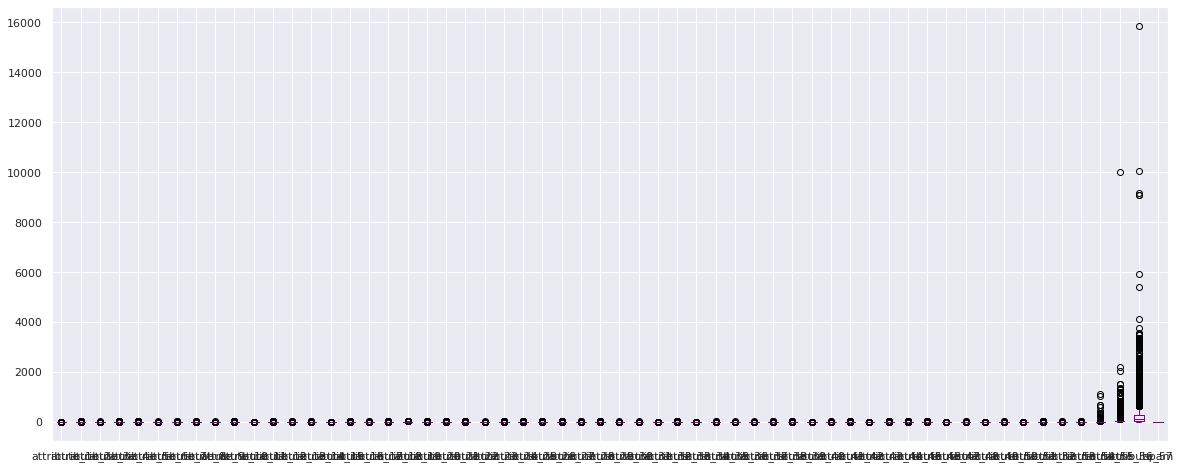

In [21]:
# Viewing the outliers
df.boxplot(figsize=(20,8),color='purple')

Though we have a great number of outliers they form over 97% of our data set hence dropping them will hugely affect our analysis. Thus, will keep them and standadize the data later.

### f. Anomalies

In [22]:
# Checking for Anomalies
df.describe()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_49,attribute_50,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,spam
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,...,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,0.104366,0.112656,0.291473,0.063078,0.325321,0.096656,0.117475,0.108000,0.091860,0.248420,...,0.040403,0.144048,0.017376,0.281136,0.076057,0.045798,5.383896,52.139905,291.181948,0.398812
std,0.300005,0.454260,0.515719,1.352487,0.687805,0.276030,0.397284,0.410282,0.282144,0.656638,...,0.252533,0.274256,0.105731,0.843321,0.239708,0.435925,33.147358,199.582168,618.654838,0.489712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627500,7.000000,40.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.500000,0.000000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706750,44.000000,273.750000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


> the data set looks normal

## 6. Exploratory Descriptive Analysis

#### a) Univariate Analysis

##### Categorical Analysis

> Frequecy tables, Bar Charts, Histograms, Pie charts etc.

##### Numerical Analysis

> Measures of Central Tendency and Measures of Dispersion/Variability/Spread, 

In [23]:
# Describing the Data
df.describe()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_49,attribute_50,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,spam
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,...,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,0.104366,0.112656,0.291473,0.063078,0.325321,0.096656,0.117475,0.108000,0.091860,0.248420,...,0.040403,0.144048,0.017376,0.281136,0.076057,0.045798,5.383896,52.139905,291.181948,0.398812
std,0.300005,0.454260,0.515719,1.352487,0.687805,0.276030,0.397284,0.410282,0.282144,0.656638,...,0.252533,0.274256,0.105731,0.843321,0.239708,0.435925,33.147358,199.582168,618.654838,0.489712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627500,7.000000,40.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.500000,0.000000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706750,44.000000,273.750000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [24]:
# Function that determines the measures of central tendency.
def MeasureCentral(measure, columns, data):
  for column in columns:
    if measure == 'mean':
      print(f"{column} column mean = {data[column].mean()}")
    elif measure == 'median':
      print(f"{column} column median = {data[column].median()}")
    elif measure == 'mode':
      print(f"{column} column mode = {data[column].mode()}")

In [25]:
# Function used to determine the measures of distribution.
def MeasureDistribution(measure, columns, data):
  for column in columns:
    if measure == 'range':
      print(f"{column} column range = {data[column].max() - data[column].min()}")
    elif measure == 'IQR':
      Q1 = data[column].quantile(0.25)
      Q3 = data[column].quantile(0.75)
      IQR = Q3 - Q1
      print(f"{column} column IQR = {IQR}")
    elif measure == 'var':
      print(f"{column} column variance = {data[column].var()}")
    elif measure == 'std':
      print(f"{column} column std = {data[column].std()}")
    elif measure == 'skew':
      print(f"{column} column skew = {data[column].skew()}")
    elif measure == 'kurt':
      print(f"{column} column kurt = {data[column].kurt()}")

In [26]:
# Distribution and Boxplot functions
def NumericalPlots(column, data1, data2):
  fig, ax = plt.subplots(2,2, figsize = (12,10))
  # Outliers
  # Distribution plot
  sb.distplot(data1[column], hist=True, ax=ax[0,0], color = 'green')
  ax[0,0].set_title('Outliers: Freq dist '+ column, fontsize=10)
  ax[0,0].set_xlabel(column, fontsize=8)
  ax[0,0].set_ylabel('Count', fontsize=8)
  # Box plot
  sb.boxplot(y = data1[column], ax = ax[0,1], color = 'green')
  ax[0,1].set_title(f'Outliers: Box Plot - {column}')
  ax[0,1].set_xlabel(column)

  # No outliers
  # Distribution plot
  sb.distplot(data2[column], hist=True, ax=ax[1,0], color = 'green')
  ax[1,0].set_title('No outliers: Freq dist '+ column, fontsize=10)
  ax[1,0].set_xlabel(column, fontsize=8)
  ax[1,0].set_ylabel('Count', fontsize=8)
  # Box plot
  sb.boxplot(y = data2[column], ax = ax[1,1], color = 'green')
  ax[1,1].set_title(f'No outliers: Box Plot - {column}')
  ax[1,1].set_xlabel(column)
  plt.show()

In [27]:
# Numerical columns
numerical = df.select_dtypes(exclude = 'object').columns.tolist()
numerical

['attribute_1',
 'attribute_2',
 'attribute_3',
 'attribute_4',
 'attribute_5',
 'attribute_6',
 'attribute_7',
 'attribute_8',
 'attribute_9',
 'attribute_10',
 'attribute_11',
 'attribute_12',
 'attribute_13',
 'attribute_14',
 'attribute_15',
 'attribute_16',
 'attribute_17',
 'attribute_18',
 'attribute_19',
 'attribute_20',
 'attribute_21',
 'attribute_22',
 'attribute_23',
 'attribute_24',
 'attribute_25',
 'attribute_26',
 'attribute_27',
 'attribute_28',
 'attribute_29',
 'attribute_30',
 'attribute_31',
 'attribute_32',
 'attribute_33',
 'attribute_34',
 'attribute_35',
 'attribute_36',
 'attribute_37',
 'attribute_38',
 'attribute_39',
 'attribute_40',
 'attribute_41',
 'attribute_42',
 'attribute_43',
 'attribute_44',
 'attribute_45',
 'attribute_46',
 'attribute_47',
 'attribute_48',
 'attribute_49',
 'attribute_50',
 'attribute_51',
 'attribute_52',
 'attribute_53',
 'attribute_54',
 'attribute_55',
 'attribute_56',
 'attribute_57',
 'spam']

In [28]:
# Mean
MeasureCentral('mean', numerical, df)

attribute_1 column mean = 0.10436579572446555
attribute_2 column mean = 0.11265558194774354
attribute_3 column mean = 0.29147268408551075
attribute_4 column mean = 0.06307838479809978
attribute_5 column mean = 0.32532066508313484
attribute_6 column mean = 0.09665558194774354
attribute_7 column mean = 0.11747505938242277
attribute_8 column mean = 0.1079999999999999
attribute_9 column mean = 0.09185985748218521
attribute_10 column mean = 0.24842042755344448
attribute_11 column mean = 0.05668646080760094
attribute_12 column mean = 0.5652042755344422
attribute_13 column mean = 0.09765558194774338
attribute_14 column mean = 0.061211401425178134
attribute_15 column mean = 0.04480285035629459
attribute_16 column mean = 0.2538289786223281
attribute_17 column mean = 0.14915439429928737
attribute_18 column mean = 0.18875534441805233
attribute_19 column mean = 1.718368171021377
attribute_20 column mean = 0.08496199524940615
attribute_21 column mean = 0.8100403800475067
attribute_22 column mean = 

In [29]:
# Median
MeasureCentral('median', numerical, df)

attribute_1 column median = 0.0
attribute_2 column median = 0.0
attribute_3 column median = 0.0
attribute_4 column median = 0.0
attribute_5 column median = 0.0
attribute_6 column median = 0.0
attribute_7 column median = 0.0
attribute_8 column median = 0.0
attribute_9 column median = 0.0
attribute_10 column median = 0.0
attribute_11 column median = 0.0
attribute_12 column median = 0.19
attribute_13 column median = 0.0
attribute_14 column median = 0.0
attribute_15 column median = 0.0
attribute_16 column median = 0.0
attribute_17 column median = 0.0
attribute_18 column median = 0.0
attribute_19 column median = 1.36
attribute_20 column median = 0.0
attribute_21 column median = 0.29
attribute_22 column median = 0.0
attribute_23 column median = 0.0
attribute_24 column median = 0.0
attribute_25 column median = 0.0
attribute_26 column median = 0.0
attribute_27 column median = 0.0
attribute_28 column median = 0.0
attribute_29 column median = 0.0
attribute_30 column median = 0.0
attribute_31 col

In [30]:
# Mode
MeasureCentral('mode', numerical, df)

attribute_1 column mode = 0    0.0
dtype: float64
attribute_2 column mode = 0    0.0
dtype: float64
attribute_3 column mode = 0    0.0
dtype: float64
attribute_4 column mode = 0    0.0
dtype: float64
attribute_5 column mode = 0    0.0
dtype: float64
attribute_6 column mode = 0    0.0
dtype: float64
attribute_7 column mode = 0    0.0
dtype: float64
attribute_8 column mode = 0    0.0
dtype: float64
attribute_9 column mode = 0    0.0
dtype: float64
attribute_10 column mode = 0    0.0
dtype: float64
attribute_11 column mode = 0    0.0
dtype: float64
attribute_12 column mode = 0    0.0
dtype: float64
attribute_13 column mode = 0    0.0
dtype: float64
attribute_14 column mode = 0    0.0
dtype: float64
attribute_15 column mode = 0    0.0
dtype: float64
attribute_16 column mode = 0    0.0
dtype: float64
attribute_17 column mode = 0    0.0
dtype: float64
attribute_18 column mode = 0    0.0
dtype: float64
attribute_19 column mode = 0    0.0
dtype: float64
attribute_20 column mode = 0    0.0
dtyp

In [31]:
# Range
MeasureDistribution('range', numerical, df)

attribute_1 column range = 4.54
attribute_2 column range = 14.28
attribute_3 column range = 5.1
attribute_4 column range = 42.81
attribute_5 column range = 10.0
attribute_6 column range = 5.88
attribute_7 column range = 7.27
attribute_8 column range = 11.11
attribute_9 column range = 5.26
attribute_10 column range = 18.18
attribute_11 column range = 2.61
attribute_12 column range = 9.67
attribute_13 column range = 5.55
attribute_14 column range = 10.0
attribute_15 column range = 4.41
attribute_16 column range = 20.0
attribute_17 column range = 7.14
attribute_18 column range = 9.09
attribute_19 column range = 18.75
attribute_20 column range = 18.18
attribute_21 column range = 11.11
attribute_22 column range = 17.1
attribute_23 column range = 5.45
attribute_24 column range = 12.5
attribute_25 column range = 20.83
attribute_26 column range = 16.66
attribute_27 column range = 33.33
attribute_28 column range = 9.09
attribute_29 column range = 14.28
attribute_30 column range = 5.88
attribute

In [32]:
# IQR
MeasureDistribution('IQR', numerical, df)

attribute_1 column IQR = 0.0
attribute_2 column IQR = 0.0
attribute_3 column IQR = 0.44
attribute_4 column IQR = 0.0
attribute_5 column IQR = 0.41
attribute_6 column IQR = 0.0
attribute_7 column IQR = 0.0
attribute_8 column IQR = 0.0
attribute_9 column IQR = 0.0
attribute_10 column IQR = 0.19
attribute_11 column IQR = 0.0
attribute_12 column IQR = 0.83
attribute_13 column IQR = 0.0
attribute_14 column IQR = 0.0
attribute_15 column IQR = 0.0
attribute_16 column IQR = 0.1275
attribute_17 column IQR = 0.0
attribute_18 column IQR = 0.0
attribute_19 column IQR = 2.72
attribute_20 column IQR = 0.0
attribute_21 column IQR = 1.28
attribute_22 column IQR = 0.0
attribute_23 column IQR = 0.0
attribute_24 column IQR = 0.0
attribute_25 column IQR = 0.0975
attribute_26 column IQR = 0.0
attribute_27 column IQR = 0.0
attribute_28 column IQR = 0.0
attribute_29 column IQR = 0.0
attribute_30 column IQR = 0.0
attribute_31 column IQR = 0.0
attribute_32 column IQR = 0.0
attribute_33 column IQR = 0.0
attribu

In [33]:
# Variance
MeasureDistribution('var', numerical, df)

attribute_1 column variance = 0.09000293577443848
attribute_2 column variance = 0.20635217642997647
attribute_3 column variance = 0.26596561400775415
attribute_4 column variance = 1.8292205521818556
attribute_5 column variance = 0.4730759841060102
attribute_6 column variance = 0.07619270862290826
attribute_7 column variance = 0.157834321663384
attribute_8 column variance = 0.16833166072701067
attribute_9 column variance = 0.07960511696743483
attribute_10 column variance = 0.431174102124759
attribute_11 column variance = 0.0339173381155297
attribute_12 column variance = 0.7788292882687357
attribute_13 column variance = 0.09567226433686292
attribute_14 column variance = 0.11976146872244099
attribute_15 column variance = 0.05865404760414314
attribute_16 column variance = 0.636061220447788
attribute_17 column variance = 0.2094609621391449
attribute_18 column variance = 0.29282529769656507
attribute_19 column variance = 3.1285116391861987
attribute_20 column variance = 0.2556139329815678
at

In [34]:
# Standard Deviation
MeasureDistribution('std', numerical, df)

attribute_1 column std = 0.3000048929174964
attribute_2 column std = 0.45426003173290125
attribute_3 column std = 0.5157185414620596
attribute_4 column std = 1.3524868029603305
attribute_5 column std = 0.6878051934276233
attribute_6 column std = 0.27603026758474924
attribute_7 column std = 0.3972836790800548
attribute_8 column std = 0.41028241581502206
attribute_9 column std = 0.2821437877526897
attribute_10 column std = 0.6566384866307784
attribute_11 column std = 0.18416660423521333
attribute_12 column std = 0.882513052746947
attribute_13 column std = 0.3093093343836602
attribute_14 column std = 0.34606570000859804
attribute_15 column std = 0.24218597730699262
attribute_16 column std = 0.7975344634859286
attribute_17 column std = 0.4576690530712612
attribute_18 column std = 0.5411333455781163
attribute_19 column std = 1.7687599156432166
attribute_20 column std = 0.5055827657086106
attribute_21 column std = 1.1493521156931146
attribute_22 column std = 1.0712583223344077
attribute_23 c

In [35]:
# Skew
MeasureDistribution('skew', numerical, df)

attribute_1 column skew = 5.869855242999023
attribute_2 column skew = 13.464663617099461
attribute_3 column skew = 2.980622758226944
attribute_4 column skew = 27.209539135206047
attribute_5 column skew = 4.696945655413882
attribute_6 column skew = 6.122652991477142
attribute_7 column skew = 6.808707185718419
attribute_8 column skew = 9.73423186777421
attribute_9 column skew = 5.284306039509901
attribute_10 column skew = 8.568578629504533
attribute_11 column skew = 5.078280750649965
attribute_12 column skew = 2.8280046744251446
attribute_13 column skew = 6.8899516279506825
attribute_14 column skew = 11.564141699105374
attribute_15 column skew = 7.513375396484275
attribute_16 column skew = 9.38774512258617
attribute_17 column skew = 5.567668427951165
attribute_18 column skew = 5.453866818258588
attribute_19 column skew = 1.524250830043939
attribute_20 column skew = 15.43017441535798
attribute_21 column skew = 2.245706812455323
attribute_22 column skew = 9.541533340465548
attribute_23 col

In [36]:
# Kurtosis
MeasureDistribution('kurt', numerical, df)

attribute_1 column kurt = 54.35140555393713
attribute_2 column kurt = 306.6859733110557
attribute_3 column kurt = 12.941446887016067
attribute_4 column kurt = 788.3700579065502
attribute_5 column kurt = 37.06480080166446
attribute_6 column kurt = 71.60326696371024
attribute_7 column kurt = 76.38164731817447
attribute_8 column kurt = 167.55021940338852
attribute_9 column kurt = 48.011373485980215
attribute_10 column kurt = 162.53903333498258
attribute_11 column kurt = 34.65611931939017
attribute_12 column kurt = 12.096068302538724
attribute_13 column kurt = 82.59629686440552
attribute_14 column kurt = 219.64515484234872
attribute_15 column kurt = 69.49380879410651
attribute_16 column kurt = 157.6917415736734
attribute_17 column kurt = 43.514184372410874
attribute_18 column kurt = 48.1574607557439
attribute_19 column kurt = 4.998065927313517
attribute_20 column kurt = 424.6857707931336
attribute_21 column kurt = 8.094203440871675
attribute_22 column kurt = 99.66608929657035
attribute_23 

#### b) Bivariate Analysis

##### Numerical and Numerical

> Scatter plots, correlations etc

In [39]:
# # Explore the types of relationships across the entire data set.
# plt.figure(figsize=(20,8))
# sb.pairplot(df)

> From the pairplots, it's hard to see any forms of correlations yet


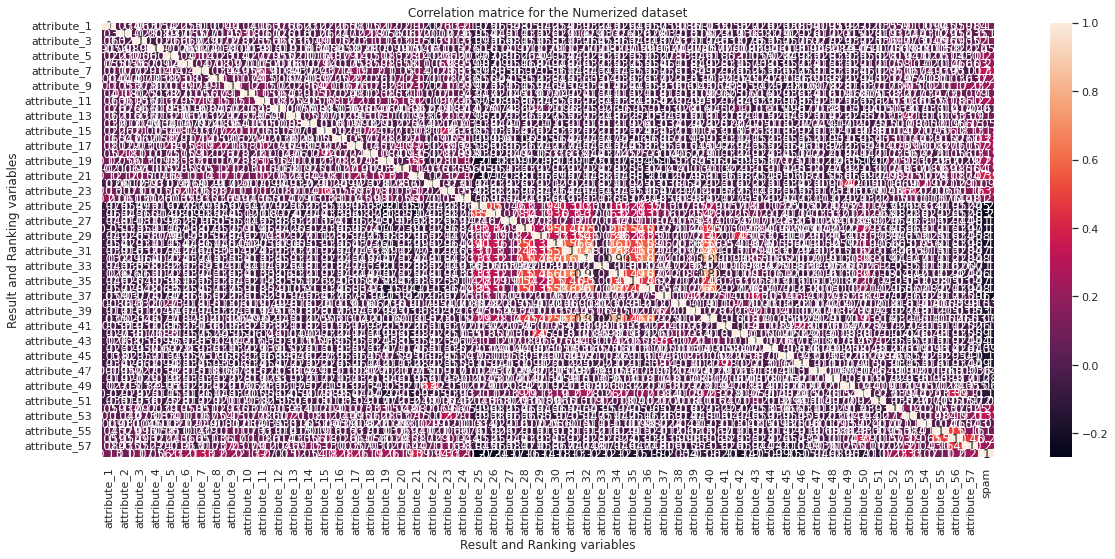

In [38]:
# Heatmap of correlation
plt.figure(figsize=(20,8))
corr_matrix = df.corr(method = 'pearson')

sb.heatmap(corr_matrix, annot = True)

plt.title("Correlation matrice for the Numerized dataset")

plt.xlabel("Result and Ranking variables")

plt.ylabel("Result and Ranking variables")

plt.show()

Too many variables

In [40]:
# defining a function to plot regression relation between two variables

def cor(col1,col2,d):
  ans = sb.regplot(x = col1, y = col2, data = d, scatter_kws = {"color": "red"}, line_kws = {"color": "black"})
  return ans

##### Categorical and Categorical

> Stacked column charts etc

##### Categorical and Numerical

> Z-test, T-test, Line charts etc

#### c) Multivariet Analysis

> Feature reduction (LDA, PCA, FA etc), Feature selection, Feature Engineering, One-Hot Encoding, Label Encoding, Multicollinearity check etc.

##### Multicollinearity Check

Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

VIF=\frac{1}{1-R^2}

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

As we see from the formula, greater the value of R-squared, greater is the VIF. Hence, greater VIF denotes greater correlation. This is in agreement with the fact that a higher R-squared value denotes a stronger collinearity. Generally, a VIF above 5 indicates a high multicollinearity. 

In [41]:
# calculating VIF for each feature
# VIF function
def VIF(data):
  # Correlation matrix
  correlation = data.corr()
  # Inverse matrix
  inv_corr = pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)
  return inv_corr

In [42]:
VIF(df)

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_49,attribute_50,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,spam
attribute_1,1.101450,-0.004258,-0.016107,-0.001599,0.007134,-0.014006,0.032895,0.048494,-0.061818,-0.005302,...,0.010822,-0.007722,0.021812,-0.019639,-0.017965,0.007037,-0.031584,0.008650,-0.040019,0.017967
attribute_2,-0.004258,1.107986,0.003902,0.016125,-0.010141,0.016181,-0.037115,0.015532,-0.005847,-0.189242,...,-0.029043,0.044266,0.017044,-0.004061,-0.015979,-0.027783,0.001481,-0.037494,-0.004253,-0.013719
attribute_3,-0.016107,0.003902,1.096759,0.026681,-0.011308,-0.015840,0.037645,0.033687,-0.020911,0.023795,...,0.004193,-0.012425,0.011985,-0.057687,0.011628,0.008159,-0.089941,-0.006818,-0.000336,-0.074631
attribute_4,-0.001599,0.016125,0.026681,1.009493,0.010155,0.021284,0.001560,0.002105,0.011507,0.002516,...,0.008908,0.023760,0.006357,0.014313,0.007629,0.010402,0.013059,-0.033460,-0.003156,-0.082426
attribute_5,0.007134,-0.010141,-0.011308,0.010155,1.139481,0.001406,-0.046338,0.041085,0.048843,0.004994,...,-0.007988,0.023191,0.000155,0.047257,0.032241,0.007414,-0.036345,-0.023949,0.059177,-0.250952
attribute_6,-0.014006,0.016181,-0.015840,0.021284,0.001406,1.087195,0.015354,-0.037792,-0.037802,0.041113,...,0.004699,-0.013665,-0.000416,-0.012365,-0.003241,-0.012484,0.053609,-0.035157,0.020631,-0.145078
attribute_7,0.032895,-0.037115,0.037645,0.001560,-0.046338,0.015354,1.196243,0.074263,0.022452,-0.003232,...,-0.007121,0.032476,0.002851,0.037879,0.018025,-0.038248,-0.000762,-0.053139,0.120032,-0.382779
attribute_8,0.048494,0.015532,0.033687,0.002105,0.041085,-0.037792,0.074263,1.118973,-0.028892,-0.039210,...,-0.001390,0.020886,0.014462,0.018131,0.024737,0.009222,0.015707,-0.007116,0.027861,-0.162059
attribute_9,-0.061818,-0.005847,-0.020911,0.011507,0.048843,-0.037802,0.022452,-0.028892,1.197584,-0.054166,...,-0.016508,0.070386,-0.037727,0.012577,-0.069566,0.004602,-0.058411,-0.020593,-0.174587,-0.083005
attribute_10,-0.005302,-0.189242,0.023795,0.002516,0.004994,0.041113,-0.003232,-0.039210,-0.054166,1.122142,...,-0.017752,0.005341,-0.019418,-0.004889,-0.011857,-0.031523,-0.048536,-0.023833,-0.006017,-0.020153


> We don't have any VIF above 5 hence our dataset has no multicollinearity

##### Label Encoding

In [43]:
# Understanding the columns
df.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_49,attribute_50,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:
# # Label encode Status column
# df[['xxx']] = df[['xxx']].apply(LabelEncoder().fit_transform)
# # Checking changes
# df.head()

> Will not label encode any column

##### One-Hot Encoding

In [44]:
# # One-hot encoding categorical columns
# df = pd.get_dummies(df)
# # Checking changes
# df.head()

> All columns are numeric

##### Linear Discriminant Analysis

In [45]:
# LDA function
def Lda(X_train, X_test, y_train, components = None):
  lda = LDA(n_components= components)
  X_train = lda.fit_transform(X_train, y_train)
  X_test = lda.transform(X_test)
  return X_train, X_test

##### Standardization

In [46]:
# Standardization function
def Standardization(X_train, X_test):
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  return X_train, X_test

## 7. Modelling

### Model 1: 80-20

#### Without Optimization

In [47]:
# Features and label
X = df.drop('spam', axis = 1)
y = df.spam
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [48]:
# Training our data set
# There is no ideal value for K and it is selected after testing and evaluation, 
# however, 5 seems to be the most commonly used value for KNN algorithm.
clf = GaussianNB()  
model = clf.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = model.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.describe()

,Actual,Predicted
count,842.000000,842.000000
mean,0.412114,0.560570
std,0.492508,0.496613
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [49]:
comparison_frame.head(10)

,Actual,Predicted
4061,0,1
2379,0,0
2709,0,0
210,1,1
3150,0,0
4521,0,0
1967,0,0
330,1,1
3094,0,0
3370,0,0


In [50]:
# Classification report
report = classification_report(y_test, y_pred)
print(f'Classification Report')
print(f'{"-"*70}\n')
print(f'{report}')

Classification Report
----------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.96      0.72      0.83       495
           1       0.71      0.96      0.82       347

    accuracy                           0.82       842
   macro avg       0.84      0.84      0.82       842
weighted avg       0.86      0.82      0.82       842



In [51]:
# Evaluating the model using confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[357 138]
 [ 13 334]]
Accuracy 0.8206650831353919


> We have a 82.07% accuracy.

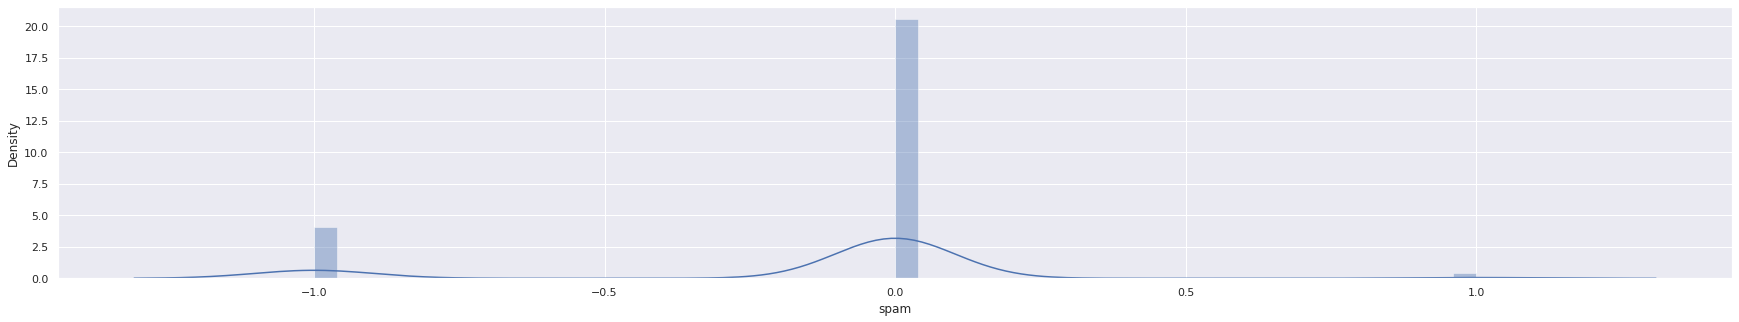

In [52]:
# Residual Plot
sb.distplot((y_test-y_pred),bins=50);

Heteroscedasticity
> Bartlett’s test is used to check whether all samples have the same variance. It’s also called Bartlett’s test for homogeneity.We will consider the level of significance of alpha value to be 0.05

In [53]:
  # Bartlett's test
  residuals = y_pred - y_test
  test_statistic, p_value = bartlett(y_pred, residuals)
  print(f'\nP_Vlaue = {p_value}')
  print(f'test_statistic = {test_statistic}')

  # Degrees of freedom
  dff = len(y_pred - 1)
  probability = 1 - p_value
  # Critical value
  critical_value = chi2.ppf(probability, dff)
  print(f'Critical Value: {critical_value}')
  if (p_value < 0.05) and (test_statistic > critical_value ):
    print('Variances are unequal')
  else:
    print('Variances are equal')


P_Vlaue = 9.475676287610599e-11
test_statistic = 41.92676330551809
Critical Value: 1130.3174809932052
Variances are equal


> Our data is homogenious

#### With Optimization

In [54]:
# Features and label
X = df.drop('spam', axis = 1)
y = df.spam
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [55]:
# Optimization
# Standardization
X_train, X_test = Standardization(X_train, X_test)

#LDA 
X_train, X_test = Lda(X_train, X_test, y_train, components = None)


In [56]:
# Training our data set
# There is no ideal value for K and it is selected after testing and evaluation, 
# however, 5 seems to be the most commonly used value for KNN algorithm.
clf = GaussianNB()  
model = clf.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = model.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.describe()

,Actual,Predicted
count,842.000000,842.000000
mean,0.412114,0.378860
std,0.492508,0.485391
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [57]:
comparison_frame.head(10)

,Actual,Predicted
4061,0,1
2379,0,0
2709,0,0
210,1,1
3150,0,0
4521,0,0
1967,0,0
330,1,1
3094,0,0
3370,0,0


In [58]:
# Classification report
report = classification_report(y_test, y_pred)
print(f'Classification Report')
print(f'{"-"*70}\n')
print(f'{report}')

Classification Report
----------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       495
           1       0.91      0.84      0.87       347

    accuracy                           0.90       842
   macro avg       0.90      0.89      0.90       842
weighted avg       0.90      0.90      0.90       842



In [59]:
# Evaluating the model using confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[467  28]
 [ 56 291]]
Accuracy 0.9002375296912114


> We have an accuracy of 90.02%

Residual Plots

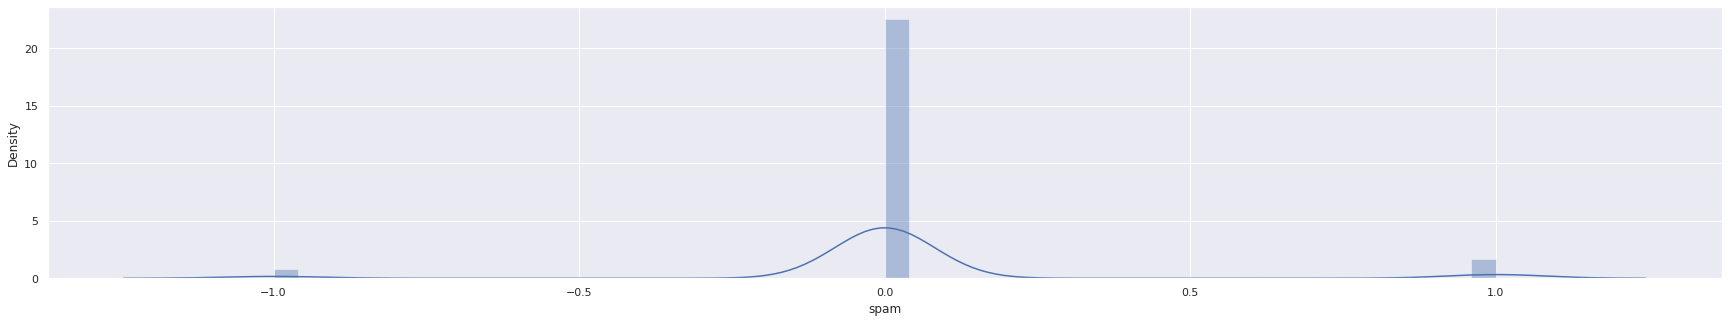

In [60]:
# Residual Plot
sb.distplot((y_test-y_pred),bins=50);

Heteroscedasticity

In [61]:
  # Bartlett's test
  residuals = y_pred - y_test
  test_statistic, p_value = bartlett(y_pred, residuals)
  print(f'\nP_Vlaue = {p_value}')
  print(f'test_statistic = {test_statistic}')

  # Degrees of freedom
  dff = len(y_pred - 1)
  probability = 1 - p_value
  # Critical value
  critical_value = chi2.ppf(probability, dff)
  print(f'Critical Value: {critical_value}')
  if (p_value < 0.05) and (test_statistic > critical_value ):
    print('Variances are unequal')
  else:
    print('Variances are equal')


P_Vlaue = 2.2765683644105472e-35
test_statistic = 154.03408164732951
Critical Value: inf
Variances are equal


#### Conclusion

* The optimized model (90.02%) has a higher accuracy compared to the non-optimized model (82.07%)



### Model 2: 70-30

#### Without Optimization

In [62]:
# Features and label
X = df.drop('spam', axis = 1)
y = df.spam
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [63]:
# Training our data set
# There is no ideal value for K and it is selected after testing and evaluation, 
# however, 5 seems to be the most commonly used value for KNN algorithm.
clf = GaussianNB()  
model = clf.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = model.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.describe()

,Actual,Predicted
count,1263.000000,1263.000000
mean,0.416469,0.560570
std,0.493168,0.496514
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [64]:
comparison_frame.head(10)

,Actual,Predicted
4061,0,1
2379,0,0
2709,0,0
210,1,1
3150,0,0
4521,0,0
1967,0,0
330,1,1
3094,0,0
3370,0,0


In [65]:
# Classification report
report = classification_report(y_test, y_pred)
print(f'Classification Report')
print(f'{"-"*70}\n')
print(f'{report}')

Classification Report
----------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.97      0.73      0.84       737
           1       0.72      0.97      0.83       526

    accuracy                           0.83      1263
   macro avg       0.85      0.85      0.83      1263
weighted avg       0.87      0.83      0.83      1263



In [66]:
# Evaluating the model using confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[541 196]
 [ 14 512]]
Accuracy 0.833729216152019


> We have a 83.37% accuracy.

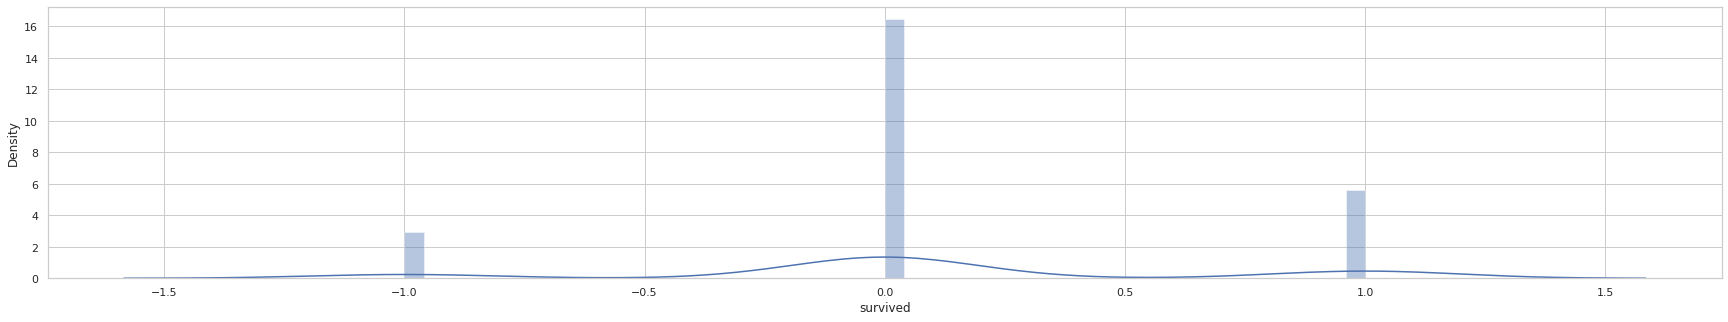

In [ ]:
# Residual Plot
sb.distplot((y_test-y_pred),bins=50);

Heteroscedasticity
> Bartlett’s test is used to check whether all samples have the same variance. It’s also called Bartlett’s test for homogeneity.We will consider the level of significance of alpha value to be 0.05

In [67]:
  # Bartlett's test
  residuals = y_pred - y_test
  test_statistic, p_value = bartlett(y_pred, residuals)
  print(f'\nP_Vlaue = {p_value}')
  print(f'test_statistic = {test_statistic}')

  # Degrees of freedom
  df1 = len(y_pred - 1)
  probability = 1 - p_value
  # Critical value
  critical_value = chi2.ppf(probability, df1)
  print(f'Critical Value: {critical_value}')
  if (p_value < 0.05) and (test_statistic > critical_value ):
    print('Variances are unequal')
  else:
    print('Variances are equal')


P_Vlaue = 1.4557051680632007e-20
test_statistic = 86.419122289331
Critical Value: inf
Variances are equal


> Our data is homogenious

#### With Optimization

In [68]:
# Features and label
X = df.drop('spam', axis = 1)
y = df.spam
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [69]:
# Optimization
# Standardization
X_train, X_test = Standardization(X_train, X_test)

#LDA 
X_train, X_test = Lda(X_train, X_test, y_train, components = None)


In [70]:
# Training our data set
# There is no ideal value for K and it is selected after testing and evaluation, 
# however, 5 seems to be the most commonly used value for KNN algorithm.
clf = GaussianNB()  
model = clf.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = model.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.describe()

,Actual,Predicted
count,1263.000000,1263.000000
mean,0.416469,0.393508
std,0.493168,0.488721
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [71]:
comparison_frame.head(10)

,Actual,Predicted
4061,0,1
2379,0,0
2709,0,0
210,1,1
3150,0,0
4521,0,0
1967,0,0
330,1,1
3094,0,0
3370,0,0


In [72]:
# Classification report
report = classification_report(y_test, y_pred)
print(f'Classification Report')
print(f'{"-"*70}\n')
print(f'{report}')

Classification Report
----------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       737
           1       0.91      0.86      0.89       526

    accuracy                           0.91      1263
   macro avg       0.91      0.90      0.90      1263
weighted avg       0.91      0.91      0.91      1263



In [73]:
# Evaluating the model using confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[693  44]
 [ 73 453]]
Accuracy 0.9073634204275535


> We have an accuracy of 90.74%



Residual Plots

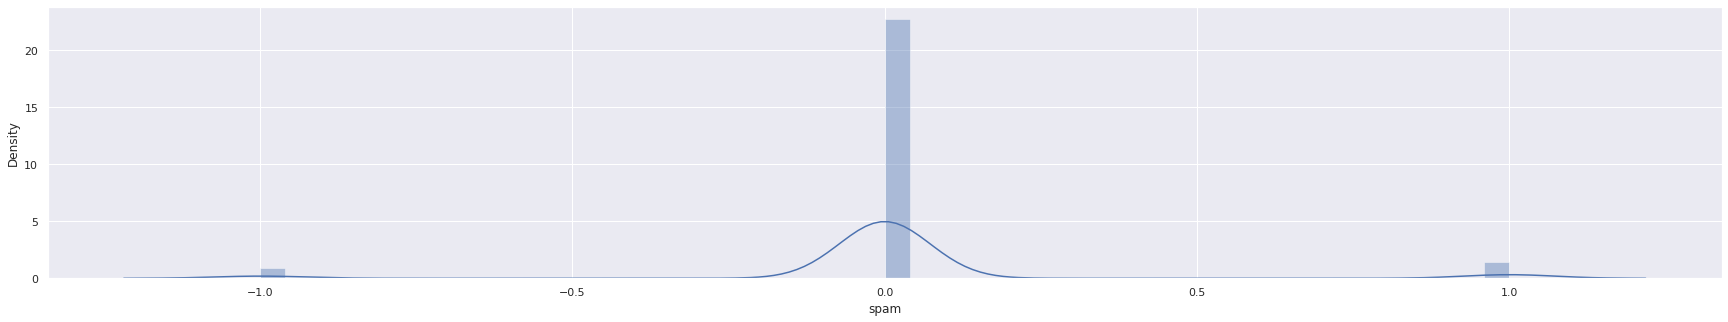

In [74]:
# Residual Plot
sb.distplot((y_test-y_pred),bins=50);

Heteroscedasticity

In [75]:
  # Bartlett's test
  residuals = y_pred - y_test
  test_statistic, p_value = bartlett(y_pred, residuals)
  print(f'\nP_Vlaue = {p_value}')
  print(f'test_statistic = {test_statistic}')

  # Degrees of freedom
  df2 = len(y_pred - 1)
  probability = 1 - p_value
  # Critical value
  critical_value = chi2.ppf(probability, df2)
  print(f'Critical Value: {critical_value}')
  if (p_value < 0.05) and (test_statistic > critical_value ):
    print('Variances are unequal')
  else:
    print('Variances are equal')


P_Vlaue = 6.57378508176763e-62
test_statistic = 275.6763714107259
Critical Value: inf
Variances are equal


#### Conclusion

* The optimized model (90.74%) has a higher accuracy compared to the non-optimized model (83.37%)

### Model 3: 60-40

#### Without Optimization

In [76]:
# Features and label
X = df.drop('spam', axis = 1)
y = df.spam
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [77]:
# Training our data set
# There is no ideal value for K and it is selected after testing and evaluation, 
# however, 5 seems to be the most commonly used value for KNN algorithm.
clf = GaussianNB()  
model = clf.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = model.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.describe()

,Actual,Predicted
count,1684.000000,1684.000000
mean,0.409739,0.549287
std,0.491932,0.497713
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [78]:
comparison_frame.head(10)

,Actual,Predicted
4061,0,1
2379,0,0
2709,0,0
210,1,1
3150,0,0
4521,0,0
1967,0,0
330,1,1
3094,0,0
3370,0,0


In [79]:
# Classification report
report = classification_report(y_test, y_pred)
print(f'Classification Report')
print(f'{"-"*70}\n')
print(f'{report}')

Classification Report
----------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.97      0.74      0.84       994
           1       0.72      0.97      0.82       690

    accuracy                           0.83      1684
   macro avg       0.84      0.85      0.83      1684
weighted avg       0.87      0.83      0.83      1684



In [80]:
# Evaluating the model using confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[735 259]
 [ 24 666]]
Accuracy 0.8319477434679335


> We have a 83.19% accuracy.


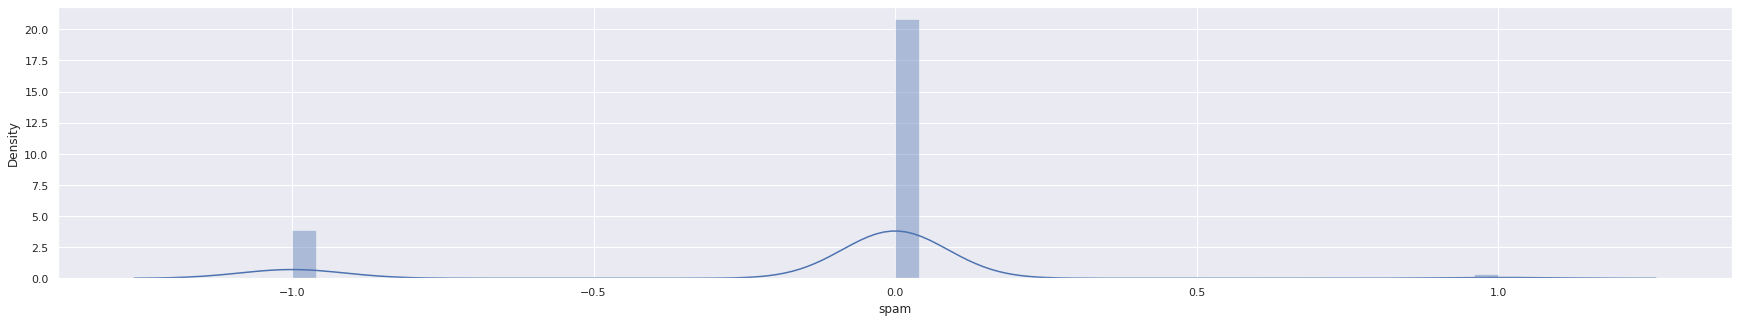

In [81]:
# Residual Plot
sb.distplot((y_test-y_pred),bins=50);

Heteroscedasticity
> Bartlett’s test is used to check whether all samples have the same variance. It’s also called Bartlett’s test for homogeneity.We will consider the level of significance of alpha value to be 0.05

In [82]:
  # Bartlett's test
  residuals = y_pred - y_test
  test_statistic, p_value = bartlett(y_pred, residuals)
  print(f'\nP_Vlaue = {p_value}')
  print(f'test_statistic = {test_statistic}')

  # Degrees of freedom
  df3 = len(y_pred - 1)
  probability = 1 - p_value
  # Critical value
  critical_value = chi2.ppf(probability, df3)
  print(f'Critical Value: {critical_value}')
  if (p_value < 0.05) and (test_statistic > critical_value ):
    print('Variances are unequal')
  else:
    print('Variances are equal')


P_Vlaue = 2.105157709321041e-25
test_statistic = 108.48425695968699
Critical Value: inf
Variances are equal


> Our data is homogenious

#### With Optimization

In [83]:
# Features and label
X = df.drop('spam', axis = 1)
y = df.spam
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [84]:
# Optimization
# Standardization
X_train, X_test = Standardization(X_train, X_test)

#LDA 
X_train, X_test = Lda(X_train, X_test, y_train, components = None)


In [86]:
# Training our data set
# There is no ideal value for K and it is selected after testing and evaluation, 
# however, 5 seems to be the most commonly used value for KNN algorithm.
clf = GaussianNB()  
model = clf.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = model.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.describe()

,Actual,Predicted
count,1684.000000,1684.000000
mean,0.409739,0.381235
std,0.491932,0.485834
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [87]:
comparison_frame.head(10)

,Actual,Predicted
4061,0,1
2379,0,0
2709,0,0
210,1,1
3150,0,0
4521,0,0
1967,0,0
330,1,1
3094,0,0
3370,0,0


In [88]:
# Classification report
report = classification_report(y_test, y_pred)
print(f'Classification Report')
print(f'{"-"*70}\n')
print(f'{report}')

Classification Report
----------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       994
           1       0.90      0.84      0.87       690

    accuracy                           0.90      1684
   macro avg       0.90      0.89      0.89      1684
weighted avg       0.90      0.90      0.90      1684



In [89]:
# Evaluating the model using confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[933  61]
 [109 581]]
Accuracy 0.8990498812351544


> We have an accuracy of 89.9%

Residual Plots

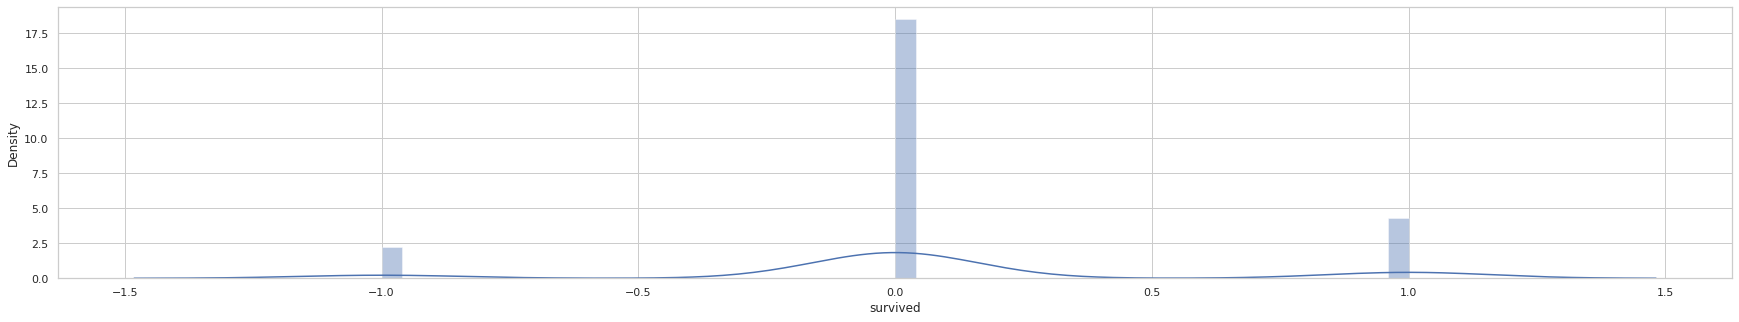

In [ ]:
# Residual Plot
sb.distplot((y_test-y_pred),bins=50);

Heteroscedasticity

In [90]:
  # Bartlett's test
  residuals = y_pred - y_test
  test_statistic, p_value = bartlett(y_pred, residuals)
  print(f'\nP_Vlaue = {p_value}')
  print(f'test_statistic = {test_statistic}')

  # Degrees of freedom
  df4 = len(y_pred - 1)
  probability = 1 - p_value
  # Critical value
  critical_value = chi2.ppf(probability, df4)
  print(f'Critical Value: {critical_value}')
  if (p_value < 0.05) and (test_statistic > critical_value ):
    print('Variances are unequal')
  else:
    print('Variances are equal')


P_Vlaue = 3.634841887895541e-67
test_statistic = 299.803943498505
Critical Value: inf
Variances are equal


#### Conclusion

* The optimized model (89.9%) has a higher accuracy compared to the non-optimized model (83.19%)

## 8. Implementing the Solution

From the analysis, this is the comparison between the models:

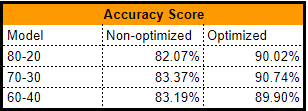

* The best model is the Optimized 70-30 Model

## 9. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






## 10. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

> Yes.

### b). Do we need other data to answer our question?

> No

### c). Did we have the right question?

> Yes